# LAB14: Data Visualization
## Nizar Alsaeed
#### the goal of this notebook is to load a solar power station data and plot the power generated across the day and make conclusions on the results

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### loading sperated weather data and power staton data 

In [2]:
df_pg = pd.read_csv('../input/solar-power-generation-data/Plant_1_Generation_Data.csv')
df_sw = pd.read_csv('../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv')

#### now, we will align the weather and power datetime data by grouping and splitting the data accross one day

In [3]:
df_pg = df_pg.groupby('DATE_TIME', as_index = False).mean()
df_pg['DATE_TIME'] = pd.to_datetime(df_pg['DATE_TIME'])
df_sw['DATE_TIME'] = pd.to_datetime(df_sw['DATE_TIME'])

df_pg = df_pg.sort_values('DATE_TIME',ascending = True)
df_sw = df_sw.sort_values('DATE_TIME',ascending = True)
df_pg = df_pg.loc[df_pg[df_pg['DATE_TIME'] == '2020-05-15 00:00:00'].index.values[0]:df_pg[df_pg['DATE_TIME'] == '2020-05-15 23:00:00'].index.values[0]]
df_sw = df_sw.loc[df_sw[df_sw['DATE_TIME'] == '2020-05-15 00:00:00'].index.values[0]:df_sw[df_sw['DATE_TIME'] == '2020-05-15 23:00:00'].index.values[0]]
df = pd.merge_asof(df_sw, df_pg, on='DATE_TIME')
df[['DATE_TIME', 'AMBIENT_TEMPERATURE', 'DC_POWER' ,'AC_POWER','TOTAL_YIELD' ]]

,DATE_TIME,AMBIENT_TEMPERATURE,DC_POWER,AC_POWER,TOTAL_YIELD
0,2020-05-15 00:00:00,25.184316,0.0,0.0,6.837223e+06
1,2020-05-15 00:15:00,25.084589,0.0,0.0,6.837223e+06
2,2020-05-15 00:30:00,24.935753,0.0,0.0,6.837223e+06
3,2020-05-15 00:45:00,24.846130,0.0,0.0,6.837223e+06
4,2020-05-15 01:00:00,24.621525,0.0,0.0,6.852802e+06
...,...,...,...,...,...
88,2020-05-15 22:00:00,22.221858,0.0,0.0,6.859051e+06
89,2020-05-15 22:15:00,22.149313,0.0,0.0,6.859051e+06
90,2020-05-15 22:30:00,22.104714,0.0,0.0,6.859051e+06
91,2020-05-15 22:45:00,22.057080,0.0,0.0,6.859051e+06


In [4]:
sns.set()

#### applying this function to change the datetime appearence in the graph

In [5]:
def datetime_ticks(string_datetime):
        string_datetime = str(string_datetime)
        output =  string_datetime[10:16]
        return output
df['DATE_TIME'] = df['DATE_TIME'].apply(datetime_ticks)
df['DATE_TIME']
    

0      00:00
1      00:15
2      00:30
3      00:45
4      01:00
       ...  
88     22:00
89     22:15
90     22:30
91     22:45
92     23:00
Name: DATE_TIME, Length: 93, dtype: object

### the solar power generated accross 24 hrs

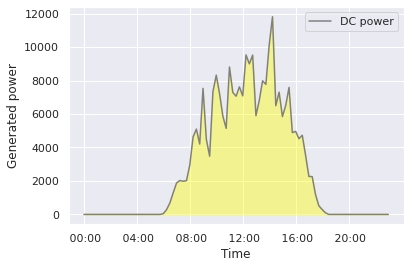

In [6]:
plt.plot(df['DATE_TIME'], df['DC_POWER'], color='gray', label = 'DC power')
plt.legend()
plt.xticks(df['DATE_TIME'][::16])
plt.xlabel('Time')
plt.ylabel('Generated power')
plt.fill_between(df['DATE_TIME'],df['DC_POWER'], color = 'yellow', alpha = 0.4)
plt.show()

### conclusions:
#### the maximum power occurs at the afternoon and exactly near 1:00 pm 
#### also, wee see a lot of variation of the power within small period of time so we can conclude that some clouds have covered the sun and resulted n a large power generation variation